In [4]:
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [5]:
df = pd.read_csv('digits.csv')

In [6]:
df1 = df.drop(["label"], axis = 1)

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Задание 1

pca = PCA(n_components=2, random_state=27)
scaled_data = StandardScaler().fit_transform(
    X=df.drop(["label"], axis=1)
)
pca_data = pca.fit_transform(scaled_data)

In [5]:
print(pca.explained_variance_ratio_)

[0.05747953 0.04111691]


In [8]:
#Задание 2

x = pca_data
print(x.shape)

(42000, 2)


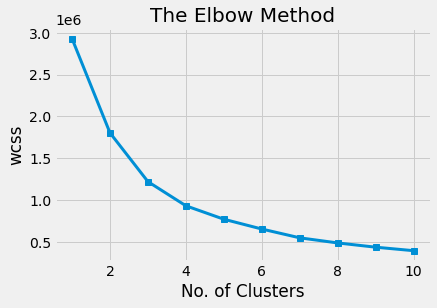

In [9]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, linewidth=3, marker="s")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [1]:
#Задание 3
import umap

In [2]:
import umap.plot

In [7]:
um = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation').fit_transform(df1)

In [10]:
mapper = umap.UMAP().fit(df1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

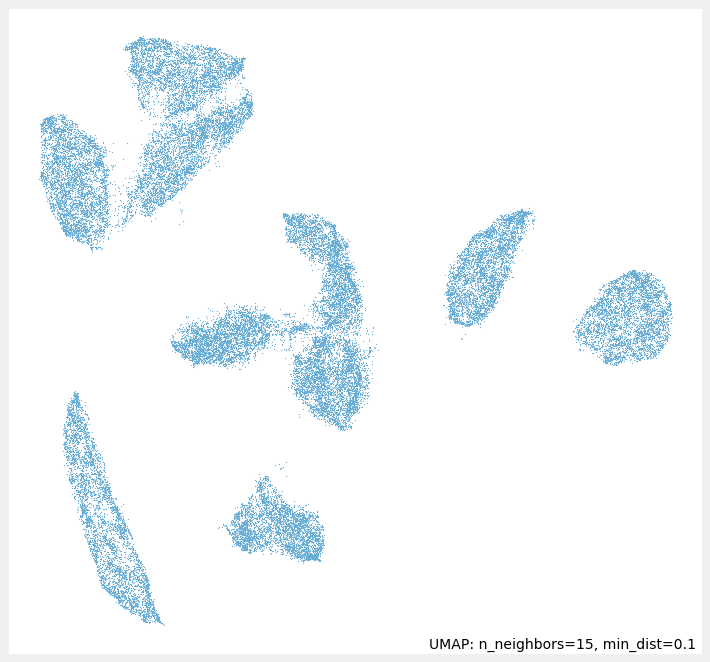

In [11]:
umap.plot.points(mapper)

<AxesSubplot:>

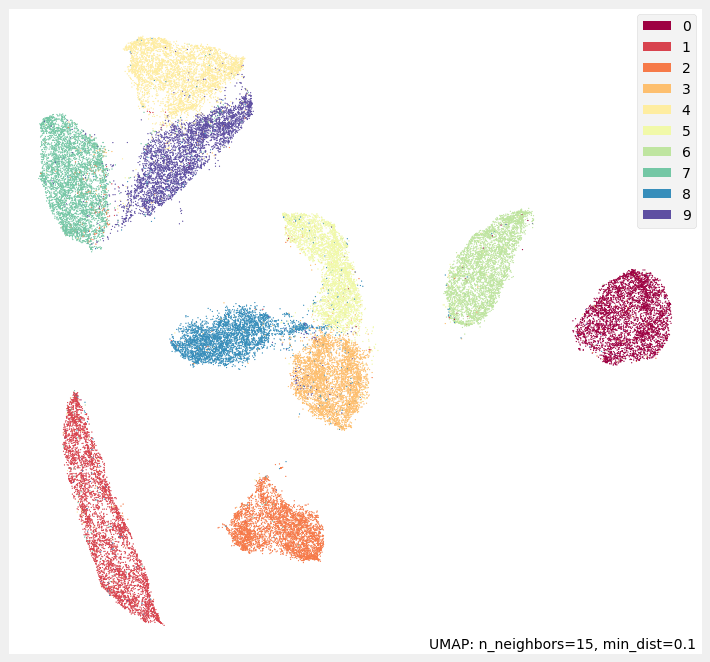

In [14]:
umap.plot.points(mapper, labels=df.label)